In [6]:
%load_ext autoreload
%autoreload 2

from petra import make_catalog_mv_normal
from petra import PosteriorChain

import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
posterior_chain = PosteriorChain.read_feather('./lisa_example.feather')

In [4]:
relabeled_chain = make_catalog_mv_normal(posterior_chain, posterior_chain.num_sources, initialization_param_index=0)

Initializing with univariate normal distribution.

Sorting the posterior chain:
	Maximum number of iterations: 200
	Maximum number of source labels:20

Fewer than 8 values in source index 4. Appending normal distribution fit to all entries.
Iteration 1: Difference in cost of assignment is -114.51971724307207 with total cost of -114.51971724307207.
	Probabilities in model: [0.99   0.8855 0.5765 0.99   0.01   0.28   0.99   0.7155 0.3845 0.99
 0.99   0.99   0.99   0.168  0.99   0.99   0.137  0.034  0.4425 0.99  ]
Iteration 2: Difference in cost of assignment is -44.321672453987944 with total cost of -158.84138969706.
	Probabilities in model: [0.99   0.8175 0.468  0.99   0.01   0.321  0.99   0.5925 0.2545 0.99
 0.99   0.99   0.99   0.1725 0.99   0.99   0.529  0.03   0.4365 0.99  ]
Iteration 3: Difference in cost of assignment is -21.51719686243922 with total cost of -180.35858655949923.
	Probabilities in model: [0.99   0.784  0.4135 0.99   0.045  0.3885 0.99   0.66   0.0875 0.99
 0.99   0.

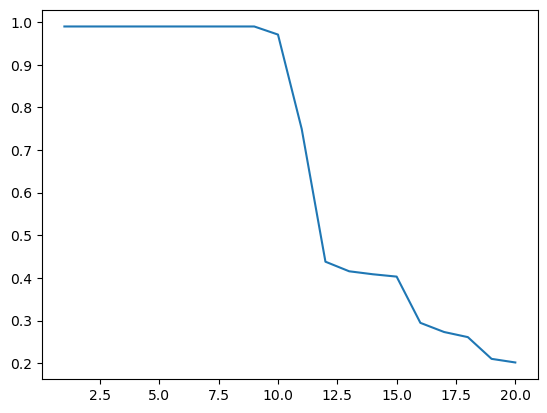

In [11]:
plt.plot(range(1, 21), sorted(relabeled_chain.prob_in_model, reverse=True))

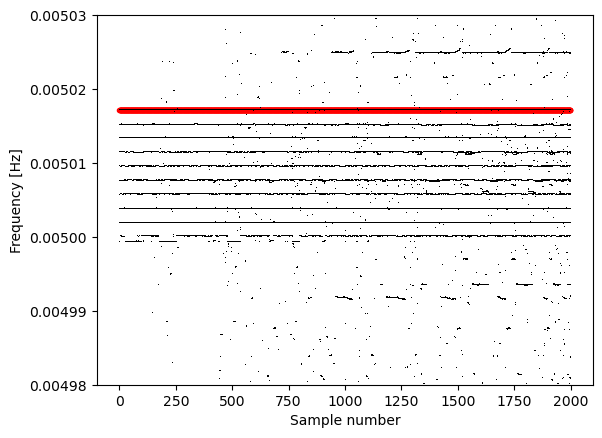

In [ ]:
# highlight the samples in red associated with this catalog source
result_index = 5  # 5th catalog source
plt.plot(result.chain[:, result_index, 0], 'r.')

for i in range(posterior_chain.chain.shape[1]):
    plt.plot(posterior_chain.chain[:, i, 0], 'k,')

plt.xlabel('Sample number')
plt.ylabel('Frequency [Hz]')
plt.ylim(0.00498, 0.00503)
plt.show()


In [6]:
posterior_chain.to_feather('./test.feather')

/Users/aaron/miniconda3/envs/petra_catalogs/lib/python3.13/site-packages/pyarrow/feather.py:156: UserWarning: The DataFrame has column names of mixed type. They will be converted to strings and not roundtrip correctly.
  table = Table.from_pandas(df, preserve_index=preserve_index)


In [8]:
import pandas as pd

from petra.posterior_chain import PosteriorChain

In [10]:
pc

array([[[ 5.00189891e-03,  1.91559799e-15,  1.42762123e-22, ...,
         -3.97223605e-01,  1.42327926e+00,  2.92971390e+00],
        [ 5.01337026e-03,  2.09202965e-15,  1.49023799e-22, ...,
          4.26524578e-01,  2.02357111e+00,  5.61702314e+00],
        [ 5.00572818e-03,  2.73152811e-15,  1.26818792e-22, ...,
          4.37612215e-01,  8.95776275e-01,  6.07785476e-01],
        ...,
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[ 5.00192902e-03,  3.33290907e-16,  1.74112582e-22, ...,
         -3.01439643e-01,  1.50207434e+00,  3.36147299e+00],
        [ 5.01335756e-03,  2.36509016e-15,  1.30851242e-22, ...,
          4.32370894e-01,  1.90641082e

In [17]:
df = pd.DataFrame(posterior_chain.chain.reshape(-1, posterior_chain.chain.shape[1] * posterior_chain.chain.shape[2]))
df['num_sources'] = posterior_chain.chain.shape[1]
df['num_params_per_source'] = posterior_chain.chain.shape[2]
df['transdimensional'] = 1

In [19]:
df['transdimensional']

0       1
1       1
2       1
3       1
4       1
       ..
1995    1
1996    1
1997    1
1998    1
1999    1
Name: transdimensional, Length: 2000, dtype: int64

In [20]:
bool(df['transdimensional'][0])

True

In [34]:
from petra.posterior_chain import PosteriorChain

In [4]:
result = make_catalog_mv_normal(posterior_chain, posterior_chain.num_sources, initialization_param_index=0)

Initializing with univariate normal distribution.

Sorting the posterior chain:
	Maximum number of iterations: 200
	Maximum number of source labels:20

Iteration 1: Difference in cost of assignment is -114.45643643936101 with total cost of -114.45643643936101.
	Probabilities in model: [0.99   0.14   0.077  0.99   0.5635 0.99   0.99   0.1135 0.99   0.99
 0.8895 0.99   0.99   0.99   0.15   0.99   0.4525 0.4235 0.792  0.024 ]
Iteration 2: Difference in cost of assignment is -42.291830943324825 with total cost of -156.74826738268584.
	Probabilities in model: [0.99   0.1475 0.145  0.99   0.99   0.99   0.616  0.0845 0.515  0.99
 0.843  0.99   0.99   0.99   0.14   0.99   0.99   0.4545 0.5905 0.0895]
Iteration 3: Difference in cost of assignment is -18.12796583609932 with total cost of -174.87623321878516.
	Probabilities in model: [0.99   0.3545 0.1645 0.99   0.99   0.99   0.574  0.1105 0.4315 0.99
 0.7875 0.99   0.99   0.99   0.05   0.99   0.99   0.5005 0.5485 0.104 ]
Iteration 4: Difference 

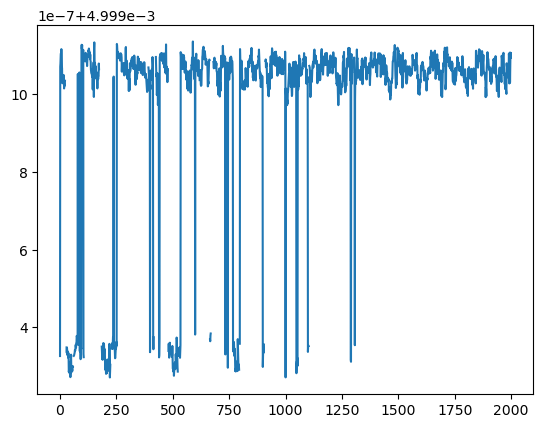

In [22]:
plt.plot(result[:, 5, 0])